In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# if you've lost the associated utils file for this lecture, use the code in Appendix A, below
from utils import plot_y_vs_yhat, plot_predictions_over_time

# Fitting Linear Models with Scikit-Learn

Notebook by Joseph E. Gonzalez, Alvin Wan

In this lesson, we introduce the normal equations as well as several other algorithms to provide some insight behind how these techniques work and perhaps more importantly how they fail.  However, in practice you will seldom need to implement the core algorithms and will instead use various machine learning software packages.  In this class, we will focus on the widely used scikit-learn package. 

Scikit-learn, or as the cool kids call it sklearn (pronounced s-k-learn), is an large package of useful machine learning algorithms. For this lecture, we will use the `LinearRegression` model in the [`linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) module.  The fact that there is an entire module with many different models within the `linear_model` module might suggest that we have a lot to cover still (we do!).  

**What you should know about `sklearn` models:**

1. Models are created by first building an instance of the model:
```python
model = SuperCoolModelType(args)
```
1. You then fit the model by calling the **fit** function passing in data:
```python
model.fit(X, Y)
```
1. You then can make predictions by calling **predict**:
```python
model.predict(X)
```

The neat part about sklearn is most models behave like this.  So if you want to try a cool new model you just change the class of model you are using. 


# 1. Load Uber Movement Speeds Dataset

To enable easy visualization of the model fitting process we will use a simple traffic speeds dataset, provided by Uber at https://movement.uber.com/cities/san_francisco/downloads/speeds?lang=en-US

In [3]:
df = pd.read_csv("data/movement-speeds.csv") # load dataset
df['time'] = (df['day'] - 1) * 24 + df['hour'] # compute absolute time reference
df.head()

,Unnamed: 0,day,hour,osm_way_id,speed_mph_mean,speed_mph_stddev,Latitude,Longitude,time
0,0,4,11,515486318,10.127,8.503,37.779522,-122.406901,83
1,1,1,12,515486318,11.217,9.453,37.779522,-122.406901,12
2,2,2,23,515486318,12.924,11.087,37.779522,-122.406901,47
3,3,1,0,515486318,13.827,9.969,37.779522,-122.406901,0
4,4,5,1,515486318,14.770,12.378,37.779522,-122.406901,97


# 2. Fit OLS Model using Scikit-Learn

We import the `LinearRegression` model

In [4]:
from sklearn.linear_model import LinearRegression

Create an instance of the model. Like before, we will use 

In [5]:
model = LinearRegression(fit_intercept=False)

## 2.a Train OLS

Fit the model by passing it the $X$ and $Y$ data:

In [6]:
X, Y = df[['time']], df[["speed_mph_mean"]] # extract data, labels

In [7]:
model.fit(X, Y)

LinearRegression(fit_intercept=False)

## 2.b Predict with OLS

Make some predictions and even save them back to the original DataFrame

In [8]:
df['Yhat_sklearn'] = Yhat = model.predict(X)
df

,Unnamed: 0,day,hour,osm_way_id,speed_mph_mean,speed_mph_stddev,Latitude,Longitude,time,Yhat_sklearn
0,0,4,11,515486318,10.127,8.503,37.779522,-122.406901,83,17.944777
1,1,1,12,515486318,11.217,9.453,37.779522,-122.406901,12,2.594426
2,2,2,23,515486318,12.924,11.087,37.779522,-122.406901,47,10.161500
3,3,1,0,515486318,13.827,9.969,37.779522,-122.406901,0,0.000000
4,4,5,1,515486318,14.770,12.378,37.779522,-122.406901,97,20.971607
...,...,...,...,...,...,...,...,...,...,...
154840,154840,4,1,85562492,31.851,6.228,37.799594,-122.445905,73,15.782756
154841,154841,7,16,85562492,22.537,6.877,37.799594,-122.445905,160,34.592342
154842,154842,1,12,85562492,26.120,7.562,37.799594,-122.445905,12,2.594426
154843,154843,7,7,85562492,35.943,4.935,37.799594,-122.445905,151,32.646522


## 2.c Analyze Fit with OLS

Analyzing the fit again:

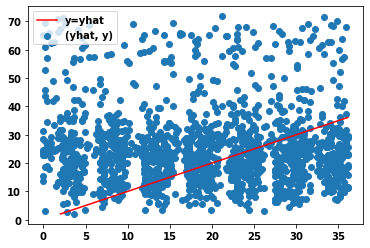

In [9]:
plot_y_vs_yhat(df.sample(frac=0.01), y="speed_mph_mean", yhat="Yhat_sklearn")

We can also plot the residual distribution. 

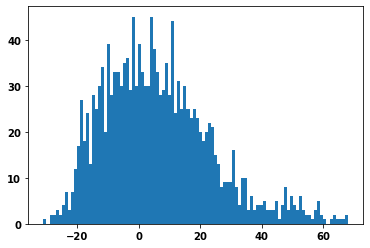

In [10]:
df['residuals_sklearn'] = df['speed_mph_mean'] - df['Yhat_sklearn'] 
_ = plt.hist(df.sample(frac=0.01)['residuals_sklearn'], bins=100)

## 2.d Evaluate OLS using Scikit-Learn

As we tune the features in our model it will be important to define some useful error metrics.  

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [12]:
print("Mean Squared Error:", mean_squared_error(Y, Yhat))

Mean Squared Error: 345.75991698324844


In [13]:
print("Mean Absolute Error:", mean_absolute_error(Y, Yhat))

Mean Absolute Error: 14.032867075474364


In [14]:
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(Y, Yhat)))

Root Mean Squared Error: 18.59462064639256


In [15]:
print("Standard Deviation of Residuals:", np.std(df['residuals_sklearn']))

Standard Deviation of Residuals: 17.566556534707953


As we play with the model we might want a standard visualization

In [16]:
def evaluate(df, y, yhat): 
    """Compute and print error metrics"""
    Y, Yhat = df[y], df[yhat]
    metrics = {
        'MSE': mean_squared_error(Y, Yhat),
        'MAE': mean_absolute_error(Y, Yhat),
        'RMSE': np.sqrt(mean_squared_error(Y, Yhat)),
    }
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    return metrics

In [17]:
def evaluate_and_plot(df, x, y, yhat):
    """Report error metrics and also visualize"""
    evaluate(df, y, yhat)
    plot_y_vs_yhat(df.sample(frac=0.01), y, yhat)
    plot_predictions_over_time(df, x, y, yhat)

Examining our latest model:

MSE: 345.75991698324844
MAE: 14.032867075474364
RMSE: 18.59462064639256


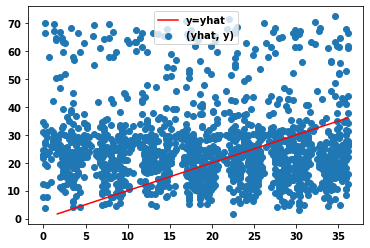

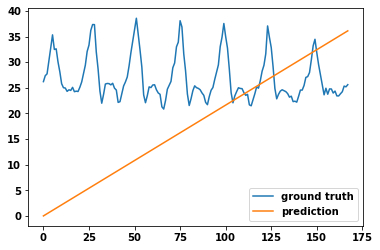

In [18]:
evaluate_and_plot(df, x='time', y='speed_mph_mean', yhat='Yhat_sklearn')

# 4. Fit Biased OLS using Scikit-Learn

Redo the above except using a model with the intercept term. This is as simple as simply passing `fit_intercept=True` to the `LinearRegression` model constructor.

In [19]:
biased = LinearRegression(fit_intercept=True) # create model
biased.fit(X, Y) # train model
df['Yhat'] = biased.predict(X) # predict with model

MSE: 186.94520321966513
MAE: 9.860686015878356
RMSE: 13.67279061565945


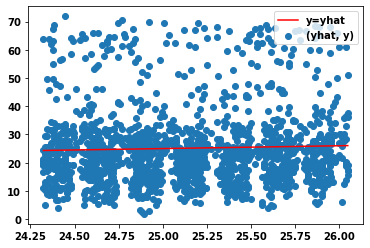

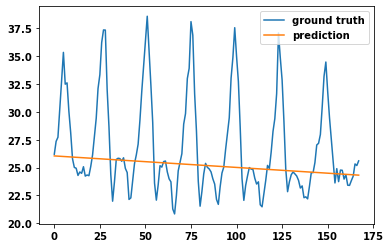

In [20]:
evaluate_and_plot(df, x='time', y='speed_mph_mean', yhat='Yhat')

Let's amend our table of results with the additional metrics above.

|     | MSE | MAE | RMSE|
|---:|---:|---:|---:|
|**OLS**|346|14.0|18.6|
|**Biased OLS**|187|9.9|13.7|

Examining the above data we see that there is some **periodic** structure as well as some **curvature**. Can we fit this data with a linear model?

# Appendix A

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def plot_y_vs_yhat(df, y, yhat):
    plt.figure()
    Y, Yhat = df[y], df[yhat]
    plt.scatter(Yhat, Y, label='(yhat, y)')
    cmin, cmax = max(Yhat.min(), Y.min()), min(Yhat.max(), Y.max())
    plt.plot([cmin, cmax], [cmin, cmax], color='red', label='y=yhat')
    plt.legend()

def plot_predictions(df, x, y, yhat):
    plt.figure()
    X, Y, Yhat = df[x], df[y], df[yhat]
    plt.plot(X, Y, label='ground truth')
    plt.plot(X, Yhat, label='prediction')
    plt.legend()

def plot_predictions_over_time(df, x, y, yhat):
    time = df.groupby(by='time').agg('mean').reset_index()
    plot_predictions(time, x, y, yhat)

# Appendix B

Code not ultimately used in lecture

In [22]:
from plotly.subplots import make_subplots

# old version of this function that had prettier plots with plotly
def evaluate_model(predict, grid_points=30): 
    # Compute Y and Yhat
    Y = df["speed_mph_mean"].to_numpy()
    X = df[["time"]].to_numpy()
    Yhat = predict(X).flatten()
    # Compute and print error metrics
    print("Mean Squared Error:", mean_squared_error(Y, Yhat))
    print("Mean Absolute Error:", mean_absolute_error(Y, Yhat))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(Y, Yhat)))

    # Make Side by Side Plots
    fig = make_subplots(rows=1, cols=2, 
                        specs=[[{'type': 'xy'}, {'type': 'xy'}]])
    
    _df = df.copy()
    _df['Yhat'] = Yhat
    time = _df.groupby(by='time').agg('mean').reset_index()
    
    # Plot predictions
    fig.add_trace(go.Scatter(x=time['time'], y=time['speed_mph_mean'], name='X'), row=1, col=1)
    fig.add_trace(go.Scatter(x=time['time'], y=time['Yhat'], name='prediction'), row=1, col=1)
    
    # Plot residuals
    Y, Yhat = Y[::100], Yhat[::100]
    fig.add_trace(go.Scatter(x=Yhat, y=Y, mode="markers"), row=1, col=2)
    xmin = np.min(Yhat)
    ymax = np.max(Yhat)
    fig.add_trace(go.Scatter(x=[xmin, ymax], y=[xmin, ymax], name="y=yhat"), row=1, col=2)
    fig.show()